# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [24]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/ana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [25]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/20-newsgroups.csv')
# 2. Print the shape
print(df.shape)

(11314, 4)


In [26]:
# 3. Inspect / remove nulls and duplicates
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [43]:
df.shape

(11314, 5)

In [27]:
df.isna().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [29]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [30]:
# 1. Make a function that makes all text lowercase.
def make_lower(a_string): 
    return a_string.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
print(test_string) 
test_string = make_lower(test_string)
print(test_string) 

This is A SENTENCE with LOTS OF CAPS.
this is a sentence with lots of caps.


In [31]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(a_string): 
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string 

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
print(test_string) 
test_string = remove_punctuation(test_string)
print(test_string) 

This is a sentence! 50 With lots of punctuation??? & other #things.
This is a sentence 50 With lots of punctuation  other things


In [32]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(a_string): 
    # Break string down into list of words 
    words = word_tokenize(a_string)
    
    valid_words = []
    
    for word in words: 
        if word not in stopwords: 
            valid_words.append(word)
    
    a_string = ' '.join(valid_words)
    return a_string


test_string = 'This is a sentence! With some different stopwords i have added in here.'
print(test_string) 
test_string = remove_stopwords(test_string)
print(test_string) 

This is a sentence! With some different stopwords i have added in here.
This sentence ! With different stopwords added .


In [33]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
def stem_words(a_string): 
    porter = PorterStemmer()
    
    #Get list of words from string 
    words = word_tokenize(a_string)
    
    valid_words = []
    
    #Loop through words, stem each, append to valid words list
    for word in words: 
        stemmed_word = porter.stem(word)
        valid_words.append(stemmed_word)
        
    #Form new string w. valid words and return it 
    a_string = ' '.join(valid_words)
    return a_string

test_string = 'I played and started playing with players and we all love to play with her plays'
print(test_string) 
test_string = stem_words(test_string)
print(test_string) 


I played and started playing with players and we all love to play with her plays
I play and start play with player and we all love to play with her play


In [34]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def pipeline(a_string): 
    a_string = make_lower(a_string)
    a_string = remove_punctuation(a_string)
    a_string = remove_stopwords(a_string)
    a_string = stem_words(a_string)
    
    return a_string

test_string = 'I have PLAYED and started playing with players, and we all love to play with plays!!!!'
print(test_string)
test_string = pipeline(test_string)
print(test_string)

I have PLAYED and started playing with players, and we all love to play with plays!!!!
play start play player love play play


In [35]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(pipeline)

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [36]:
# 1. Define your `X` and `y` data. 
X = df['message_clean'].values
y = df['topic_category'].values 


In [38]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()


In [39]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X)

TfidfVectorizer()

In [40]:
# 4. Transform your X data using your fitted vectorizer. 
X = vectorizer.transform(X)


In [42]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X.shape, type(X))
print(f'Now we have {X.shape[1]} features')

(11314, 119708) <class 'scipy.sparse.csr.csr_matrix'>
Now we have 119708 features


# Split your data into Training and Testing data. 

In [44]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [45]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha=0.05)



In [46]:
# Fit our model with our training data.
model.fit(X_train, y_train)



MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [47]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)



In [48]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.897039


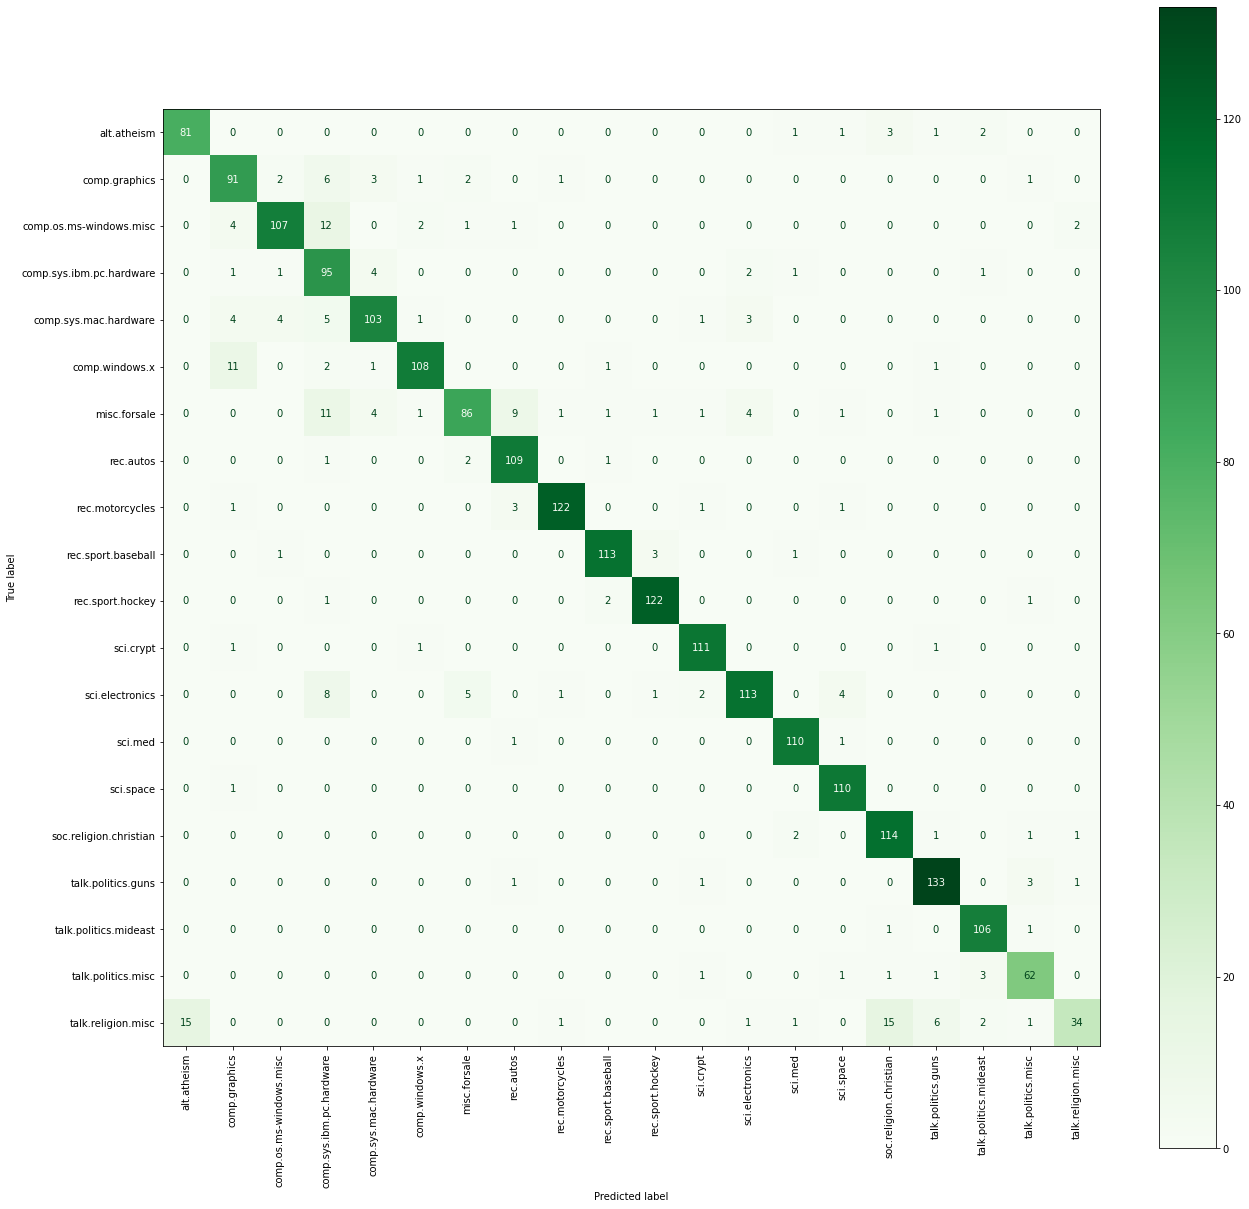

In [50]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21, 21))
disp = plot_confusion_matrix(model, X_test, y_test, 
                            display_labels=model.classes_, 
                            cmap=plt.cm.Greens, 
                            ax=ax)
plt.xticks(rotation=90)
disp


In [51]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.84      0.91      0.88        89
           comp.graphics       0.80      0.85      0.82       107
 comp.os.ms-windows.misc       0.93      0.83      0.88       129
comp.sys.ibm.pc.hardware       0.67      0.90      0.77       105
   comp.sys.mac.hardware       0.90      0.85      0.87       121
          comp.windows.x       0.95      0.87      0.91       124
            misc.forsale       0.90      0.71      0.79       121
               rec.autos       0.88      0.96      0.92       113
         rec.motorcycles       0.97      0.95      0.96       128
      rec.sport.baseball       0.96      0.96      0.96       118
        rec.sport.hockey       0.96      0.97      0.96       126
               sci.crypt       0.94      0.97      0.96       114
         sci.electronics       0.92      0.84      0.88       134
                 sci.med       0.95      0.98      0.96       112
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [53]:
my_sentence = "A lot of people are talking about how important it is to vote during this election."

# 1. Apply the text pipeline to your sentence
my_sentence = pipeline(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([my_sentence])
# 3. Use the model to predict your new `X`. 
model.predict(X)
# 4. Print the prediction
pred_prob = model.predict_proba(X)
for c, p in zip(model.classes_, pred_prob.round(3)[0]):
    print(c, p)

alt.atheism 0.038
comp.graphics 0.004
comp.os.ms-windows.misc 0.003
comp.sys.ibm.pc.hardware 0.002
comp.sys.mac.hardware 0.004
comp.windows.x 0.002
misc.forsale 0.001
rec.autos 0.021
rec.motorcycles 0.067
rec.sport.baseball 0.025
rec.sport.hockey 0.042
sci.crypt 0.071
sci.electronics 0.022
sci.med 0.039
sci.space 0.041
soc.religion.christian 0.065
talk.politics.guns 0.186
talk.politics.mideast 0.082
talk.politics.misc 0.278
talk.religion.misc 0.004


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [54]:
# 1. Load the dem-vs-rep-tweets.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
df.shape

(86460, 3)

In [55]:
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [56]:
# Check for null vals
df.isna().sum()

Party     0
Handle    0
Tweet     0
dtype: int64

In [57]:
# Check for duplicates 
df.duplicated().sum()

57

In [58]:
# Remove duplicates 
df.drop_duplicates(inplace=True)

In [59]:
# Sanity Check 
df.duplicated().sum()

0

In [60]:
# apply text normalization pipeline to tweets 
df['tweet_clean'] = df['Tweet'].apply(pipeline)

In [61]:
# Set X, fit x to vectorizer, and transform x using vectorizer
X = df['tweet_clean'].values
y = df['Party'].values

vectorizer.fit(X)
X = vectorizer.transform(X)

# Print result of transfomation 
print(X.shape, type(X))
print(f'Now we have {X.shape[1]} features')

(86403, 121124) <class 'scipy.sparse.csr.csr_matrix'>
Now we have 121124 features


In [62]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)

In [64]:
# Initialize new model (trying Random Forest this time)
rf_model = RandomForestClassifier()
# Fit model to data
rf_model.fit(X_train, y_train)
#Make prediction using model 
y_pred = rf_model.predict(X_test)

#Get accuracy score of prediction
accuracy = rf_model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

# Get predicted probabilities
y_pred_proba = rf_model.predict_proba(X_test)

#Print Classification report
print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

Model accuracy: 0.7625716104392107
              precision    recall  f1-score   support

    Democrat       0.77      0.74      0.75      8421
  Republican       0.76      0.79      0.77      8860

    accuracy                           0.76     17281
   macro avg       0.76      0.76      0.76     17281
weighted avg       0.76      0.76      0.76     17281



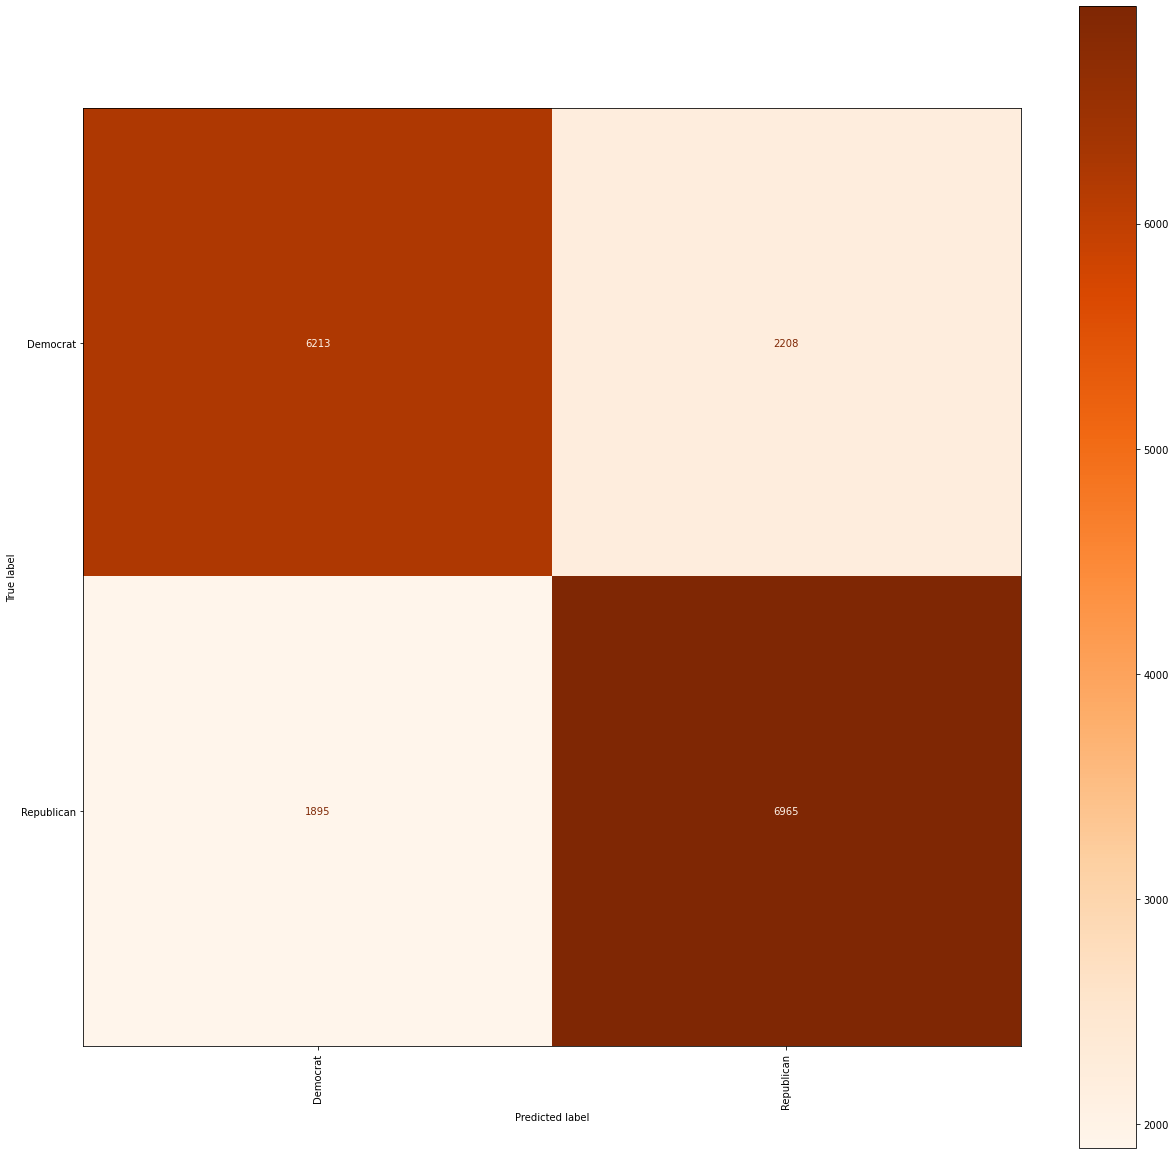

In [65]:
#Plot confusion matrix 
fig, ax = plt.subplots(figsize=(21, 21))
disp = plot_confusion_matrix(rf_model, X_test, y_test, 
                            display_labels=rf_model.classes_, 
                            cmap=plt.cm.Oranges, 
                            ax=ax)
plt.xticks(rotation=90)
disp


In [68]:
# Test out with random tweet found online 
tweet = "Bring on the next generation of leaders - people who can move us forward on issues like climate change and equality for all. @cheapism #Politics #Leaders"

# 1. Apply the text pipeline to your sentence
tweet = pipeline(tweet)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([tweet])
# 3. Use the model to predict your new `X`. 
rf_model.predict(X)
# 4. Print the prediction
pred_prob = rf_model.predict_proba(X)
for c, p in zip(rf_model.classes_, pred_prob.round(3)[0]):
    print(c, p)

Democrat 0.73
Republican 0.27
